<center><h2>ATTENTION! Avant de démarrer, merci de suivre la procédure en 4 étapes ci-dessous pour le bon fonctionnement de la page</h2></center>
<b style="color:red;">1°) Cliquez sur le bouton "Sans Confiance"</b> 
<center><img src="./trust.png"></center>
<p>
<br></p>
<b style="color:red;">2°) Cliquer sur le bouton rouge "Faire Confiance" pour autoriser l'exécution des scripts de la page</b>
<center><img src="./trust2.png"></center>
<p>
<br></p>
<b style="color:red;">3°) Cliquez sur l'icone "redémarrer le noyau et ré-exécuter tout le notebook"</b>
<center><img src="./trust3.png"></center>
<p>
<br></p>
<b style="color:red;">4°) Cliquez sur le bouton rouge "Relancer et exécuter toutes les cellules" pour exécuter tous les programmes pythons déjà présents sur la page</b>
<center><img src="./trust4.png"></center>

<div id="Titre"></div>

# TP2 - Caractéristique d'un dipôle


<h2>Travail demandé:</h2>

<ol><li> Inscrire vos réponses, programmes, images dans les blocs réponse prévus pour construire votre compte rendu</li>
<li> Vous pouvez tester et/ou modifier les différents morceaux de code proposés</li>
<li> Sauvegardez régulièrement votre travail. Attention, la sauvegarde se fait dans un espace temporaire et le fichier sera perdu au bout de quelques heures. </li>
<li> Téléchargez votre fichier au <b>format Notebook</b> si vous souhaitez pouvoir le <b>modifier plus tard</b>. Téléchargez le au <b> format html</b> si vous souhaitez simplement une <b>trace écrite</b> ou pour le rendre au professeur.</li></ol>

In [1]:
# This is a cell to hide code snippets from displaying
# This must be at first cell!

from IPython.display import HTML

hide_me = ''
HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      el = $(this).find('.cm-variable:first');
      if (id == 0 || el.text() == 'hide_toggle') {
        $(this).hide();
        $(this).parent().next().find('div.input').hide();
        $(this).parent().next().find('div.output').hide();
       
      }
    });

    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {
    if (id == 0 ){
      $(this).show();
            $(this).parent().next().find('div.input').show();
        $(this).parent().next().find('div.output').show();
    }
    });
    $('div.output_prompt').css('opacity', 1);
  
  }
  code_show = !code_show
} 

$( document ).ready(code_toggle);
</script>''')
#<form action="javascript:code_toggle()"><input style="opacity:0" type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# fonction pour cacher une cellule
# à exécuter une fois au début pour la mettre en mémoire

from IPython.display import HTML
import random



def hide_toggle(for_next=True,texte="Montrer/cacher"):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'
  

    toggle_text = texte  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        js_hide_current = this_cell + '.find("div.input").hide();'+this_cell+ '.find("div.output").hide();'

    js_f_name = f'code_toggle_{random.randint(1,2**64)}'

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
                {cell_selector}.find('div.output').toggle();
                {this_cell}.find('div.input').hide();

            }}
             $('div.prompt').hide();
        </script>

        <form action="javascript:{f_name}()"><input type="submit" id="toggleButton" value={toggle_text}></form>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text,
        this_cell=this_cell
    )
    

    return HTML(html)




In [3]:
hide_toggle(texte="Installation_automatique_des_bilbiothèques")

In [4]:
# Installation des bibliothèques à exécuter une fois au début
!pip install matplotlib
!pip install scipy


<h3>Matériel :</h3>
<ul><li>Arduino nano</li>
    <li>Breadboard</li>
    <li>Fils</li>
    <li>2 Résistances $4{,}7\ k\Omega$</li>
    <li>1 Résistance $10\ \Omega$</li>
    <li>1 Résistance $220\ \Omega$</li>
    <li>1 potentiomètre $10 k\Omega$</li>
    <li>1 LED</li>
    <li>1 pile 1,5 V</li>
    <li>1 support de pile</li>
    <li>Ordinateur</li></ul>
    <br>
<h3>Logiciels :</h3>
<ul><li>Navigateur web type Mozilla firefox</li>
    <li>IDE Arduino</li></ul>
    <br>

In [5]:
# imports à exécuter une fois au début
from math import log
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [6]:
%matplotlib notebook

# Sujet

<p>Nous souhaitons tracer la caractéristique U = f(I) de trois dipôles, une résistance, une LED et une pile. Nous étudierons également l’association de 2 résistances en série et en parallèle pour voir comment l’association se comporte.
Pour cela, nous allons utiliser une carte Arduino. Cependant, elle ne peut mesurer que des tensions. Nous utiliserons donc une résistance de valeur connue pour déterminer la valeur de l’intensité. Ainsi, la loi d’ohm est supposée connue en début de TP puisque nous l’utilisons -et le tracé de la caractéristique pour une seule résistance n’a donc pas d’autre intérêt que de s’entraîner à manipuler les outils-.

Le potentiomètre va lui servir à modifier l’intensité qui traverse le dipôle étudié et à ainsi obtenir plusieurs points.

Pour étudier la caractéristique U = f(I) d’une résistance, réalisez le montage de la<b> figure 1</b> sans brancher la carte à l’ordinateur. On utilise un potentiomètre de $10\ k\Omega$, monté en série avec le dipôle étudié (ici une résistance R<sub>1</sub> donnée pour $4{,}7\ k\Omega$) et une résistance R<sub>2</sub> connue (ici R<sub>2</sub> = $220\ \Omega$).</p>
<br>
<p><center><b>Figure 1. Montage à réaliser</b>
<img src="./TP2_figure1.png"></center></p>
<br>
Cela correspond au schéma électrique suivant:
<center><b>Figure 2. Schéma électrique équivalent</b>
<img src="./TP2_figure2.png"></center>

<b>1°)</b> Quelle relation y a-t-il entre <b>U<sub>0</sub>, U<sub>1</sub>, U<sub>2</sub> et U<sub>3</sub></b> d'après la loi des mailles ?

<b>2°)</b> Que peut-on dire de l'intensité <b>I</b> qui traverse <b>R<sub>1</sub></b>, de celle qui traverse <b>R<sub>2</sub></b>et de celle qui traverse <b>R<sub>3</sub></b>.

<b>3°)</b> Quelle relation y-a-t-il entre la tension <b>U<sub>3</sub></b>, la résistance <b>R<sub>3</sub></b> et l'intensité <b>I</b> ?

<b>4°)</b> Même question pour <b>U<sub>1</sub>, R<sub>1</sub> et I </b>.

<p>Le montage réalisé sur la carte Arduino nous permet de mesurer (U2 + U3) sur une entrée analogique et U3 sur une deuxième entrée analogique. On connaît R3 et ce qui nous intéresse ici est la valeur de U2 et celle de I. </p>
<p>Les tensions sont mesurées par le convertisseur analogique numérique de la carte Arduino qui numérise une tension entre 0 et 5V sur 10 bits. C’est à dire que la carte nous renvoie une valeur entière entre 0 et 2<sup>10</sup> – 1 ; 0 pour une tension de 0V et 1023 pour une tension de 5V.</p>
<br>
<b>5°)</b> Quelle est la tension mesurée lorsque <b>la carte Arduino renvoie 534 ?</b>

<b>6°)</b> Si on note <b>n3</b> la valeur entière renvoyée par la carte Arduino pour la <b>mesure de U<sub>3</sub> et n2</b> la valeur entière renvoyée par la carte pour la mesure de <b>(U2 + U3)</b>, exprimer la valeur de la tension <b>U2</b> mesurée.

<b>7°)</b> Exprimer <b>la valeur de I</b> en fonction de <b>n3 et R3</b>

<b>8°)</b> Téléchargez le programme Arduino <a href="./caracteristique.ino" target="_blank">caracteristique.ino</a> fourni. Que fait ce programme ?

<b>9°)</b> Modifiez le programme arduino précédent pour qu'il renvoie la valeur de la tension <b>U2</b> (en V) aux bornes du dipôle étudié et la valeur de <b>I</b> (en mA) sur une même ligne environ <b>deux fois par seconde</b>.

<a href="./caracteristique_cor.ino" target="_blank">correction</a>

<p>Réalisez le montage de la <b>figure 1.</b>, faites vérifier votre montage et votre programme puis téléverser le programme vers la carte Arduino (attention de bien régler <b style="color:red;">le type de carte, le port et le processeur)</b></p>
<p>Nous allons maintenant réaliser des mesures de tension U2 (en V) aux bornes du dipôle et d’intensité I (en mA) qui traverse ce dipôle. Pour cela, ouvrir le <b>moniteur série</b> du logiciel Arduino. Réglez le débit binaire à la même valeur que dans votre programme arduino (115200 ici). Vous pouvez alors lire et noter les valeurs de la tension U2 aux bornes du dipôle et de l’intensité I qui le traverse sur une même ligne. En modifiant le réglage du potentiomètre, vous modifiez ces valeurs et pouvez faire un autre relevé.</p>

<b>10°)</b> Réalisez 5 mesures de couples U, I dans le cas de ce dipôle en modifiant à chaque fois la valeur du potentiomètre et <b style="color:red;">stockez les dans les listes python ci-dessous.</b>

In [7]:
U = [] #rentrer ici les valeurs de tension mesurée en V
I = [] #et ici les intensités correspondantes en mA

<b>11°)</b> Ecrire ci-dessous <b style="color:red;">un programme python</b> permettant de tracer le graphique représentant <b>U2 en fonction de I</b> pour vos mesures.
<p>Vous pourrez utiliser <a href="./methode_courbe.ipynb" target="_blank">la fiche méthode_courbe fournie</a>.</p>

In [8]:
hide_toggle(texte="Correction")

<IPython.core.display.Javascript object>


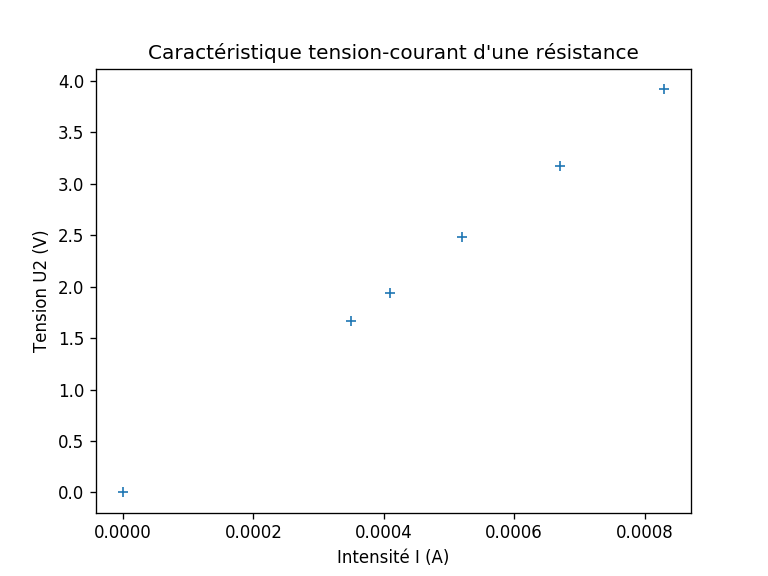

In [9]:
U=[0.,3.92,3.17,2.48,1.94,1.67]
I=[0.,0.83e-3,0.67e-3,0.52e-3,0.41e-3,0.35e-3]

plt.figure("Question 11°)")
plt.plot(I,U,"+")

plt.xlabel("Intensité I (A)")
plt.ylabel("Tension U2 (V)")
plt.title("Caractéristique tension-courant d'une résistance")
plt.show()

<b>12°)</b> Ecrire ci-dessous <b style="color:red;">un programme python</b> permettant de modéliser cette série de données par une fonction linéaire et d'afficher <b>sur un même graphique les points expérimentaux, le modèle et son équation.</b> 
<p>Vous pourrez utiliser <a href="./methode_modele.ipynb" target="_blank">la fiche méthode_modèle fournie</a>.</p>

In [10]:
hide_toggle(texte="Correction")

<IPython.core.display.Javascript object>


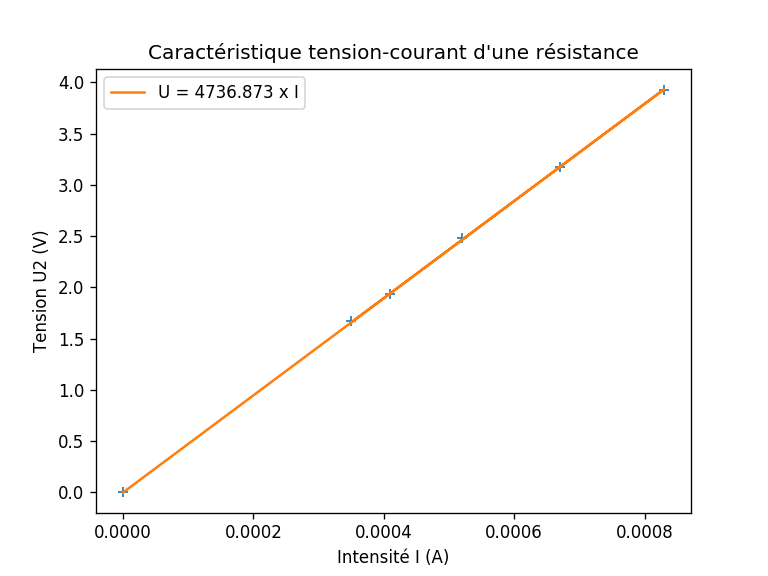

In [11]:
plt.figure("Question 12°)")
plt.plot(I,U,"+")

def lineaire(x,a):
    return a*x
    
params,cov = curve_fit(lineaire,I,U)

modele=[]
x=[0]+I
for i in x:
    modele.append(lineaire(i,*params))
plt.plot(x,modele,label="U = {:.3f} x I".format(*params))

plt.legend()
plt.xlabel("Intensité I (A)")
plt.ylabel("Tension U2 (V)")
plt.title("Caractéristique tension-courant d'une résistance")
plt.show()

<b>13°)</b> Contrôlez la valeur de la résistance étudiée à l'aide d'un multimètre. Cette valeur est-elle en accord avec l'équation du modèle ?

<b>14°)</b> Débranchez la carte Arduino de l'ordinateur. Modifiez le montage pour étudier deux résistances de $4{,}7\ k\Omega$ montées en dérivation, et modifiez si besoin le programme Arduino en conséquence. Faites vérifier votre montage et votre programme puis téléversez le programme vers la carte Arduino. Attention de bien régler <b style="color:red;">le type de carte, le port et le processeur</b>.

In [12]:
hide_toggle(texte="Montage")

<IPython.core.display.Javascript object>


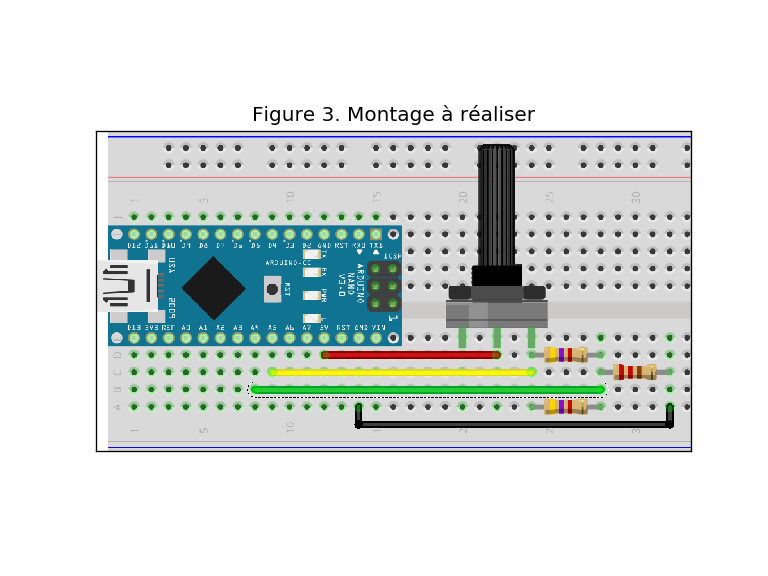

In [13]:
plt.figure("Figure 3. Montage à réaliser")
im=plt.imread("./TP2_figure3.png")
plt.xticks([])
plt.yticks([])
plt.xlim([0,930])
plt.ylim([500,0])
plt.title("Figure 3. Montage à réaliser")
plt.imshow(im)
plt.show()

<b>15°)</b> Réalisez 5 mesures de couples U, I dans le cas de cette association de dipôles en modifiant à chaque fois la valeur du potentiomètre et <b style="color:red;">stockez les dans les listes python ci-dessous.</b>

In [14]:
U = [] #rentrer ici les valeurs de tension mesurée en V
I = [] #et ici les intensités correspondantes en mA

<p><b>16°)</b> Ecrire ci-dessous <b style="color:red;">un programme python</b> permettant de tracer le graphique représentant <b>U en fonction de I</b> pour vos mesures. Vous prendrez soin de mettre un titre, et des informations sur les deux axes.</p>

In [15]:
hide_toggle(texte="Correction")

<IPython.core.display.Javascript object>


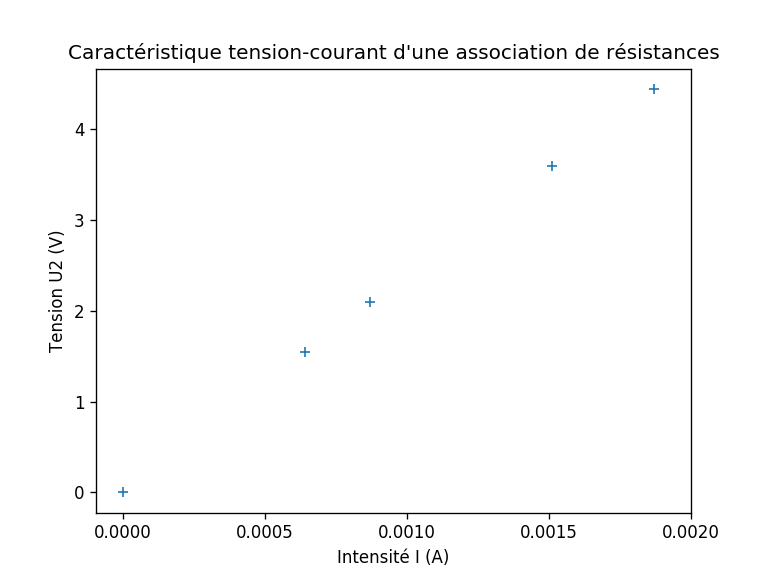

In [16]:
#On utilise le même programme qu'à la qurestion 10 avec les nouvelles valeurs
U=[0.,4.44,3.59,2.10,1.55]
I=[0.,1.87e-3,1.51e-3,0.87e-3,0.64e-3]

plt.figure("Question 16°)")
plt.plot(I,U,"+")
plt.xticks([0.,0.5e-3,1.e-3,1.5e-3,2.e-3])
plt.xlabel("Intensité I (A)")
plt.ylabel("Tension U2 (V)")
plt.title("Caractéristique tension-courant d'une association de résistances")
plt.show()

<b>17°)</b> Ecrire ci-dessous <b style="color:red;">un programme python</b> permettant de modéliser cette série de données par une fonction mathématique qui vous paraîtra adaptée et d'afficher <b>sur un même graphique les points expérimentaux, le modèle et son équation.</b> 

In [17]:
hide_toggle(texte="Correction")

<IPython.core.display.Javascript object>


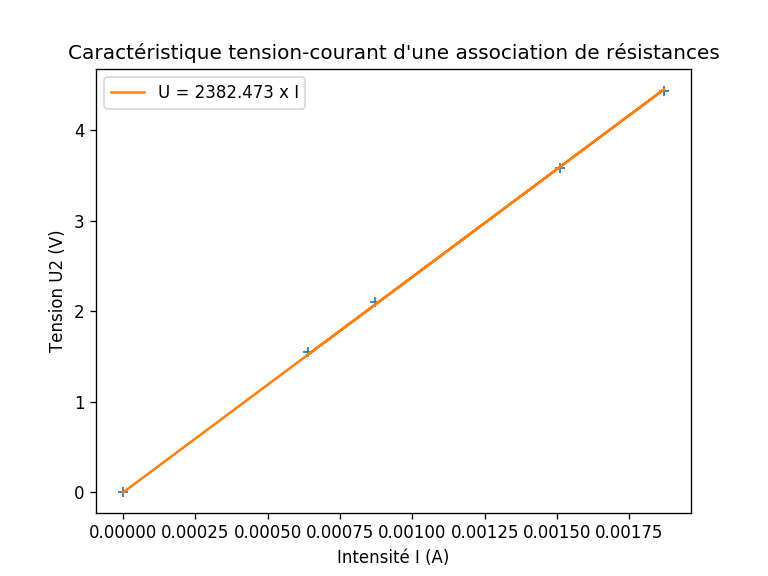

In [18]:
#On utilise le même programme qu'à la qurestion 11 avec les nouvelles valeurs
#Les points semblent alignés et la droite passer par zéro, on utilise donc un modèle linéaire.
plt.figure("Question 17°)")
plt.plot(I,U,"+")

def lineaire(x,a):
    return a*x
    
params,cov = curve_fit(lineaire,I,U)

modele=[]
x=[0]+I
for i in x:
    modele.append(lineaire(i,*params))
plt.plot(x,modele,label="U = {:.3f} x I".format(*params))

plt.legend()
plt.xlabel("Intensité I (A)")
plt.ylabel("Tension U2 (V)")
plt.title("Caractéristique tension-courant d'une association de résistances")
plt.show()

<p><b>18°)</b> L’association de résistances se comporte-t-elle comme une résistance ?</p>
<p>Si oui, quelle est la valeur de la résistance équivalente ?</p>

<b>19°)</b> Réalisez la même étude dans le cas d'une association de deux résistances de $4{,}7\ k\Omega$ montées en série. Vous pourrez utiliser une résistance de 220 ohms ou une résistance de 1000 ohms comme R3.  Ecrivez ci-dessous <b style="color:red;">les programmes python nécessaires.</b>

In [19]:
hide_toggle(texte="Montage")

<IPython.core.display.Javascript object>


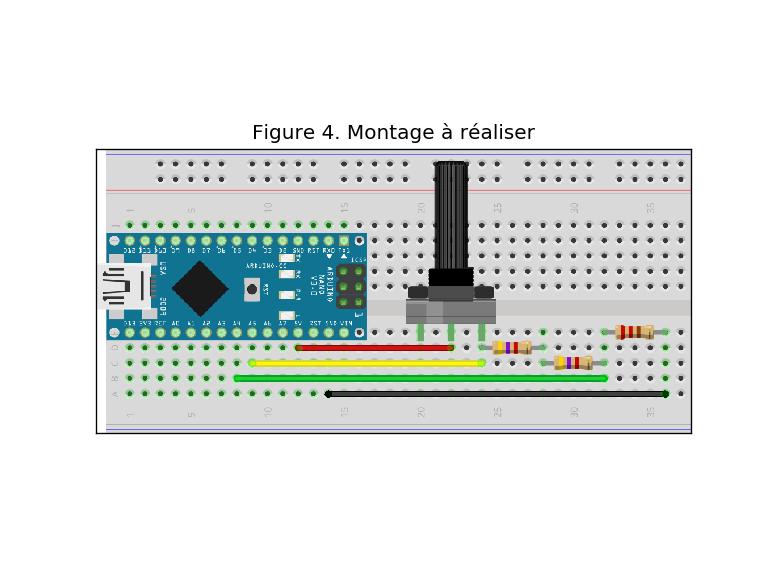

In [20]:
#Afficher le montage à réaliser
plt.figure("Figure 4. Montage à réaliser")
im=plt.imread("./TP2_figure4.png")
plt.xticks([])
plt.yticks([])
plt.title("Figure 4. Montage à réaliser")
plt.xlim([0,1050])
plt.ylim([500,0])
plt.imshow(im)
plt.show()

In [21]:
hide_toggle(texte="Correction")

<IPython.core.display.Javascript object>


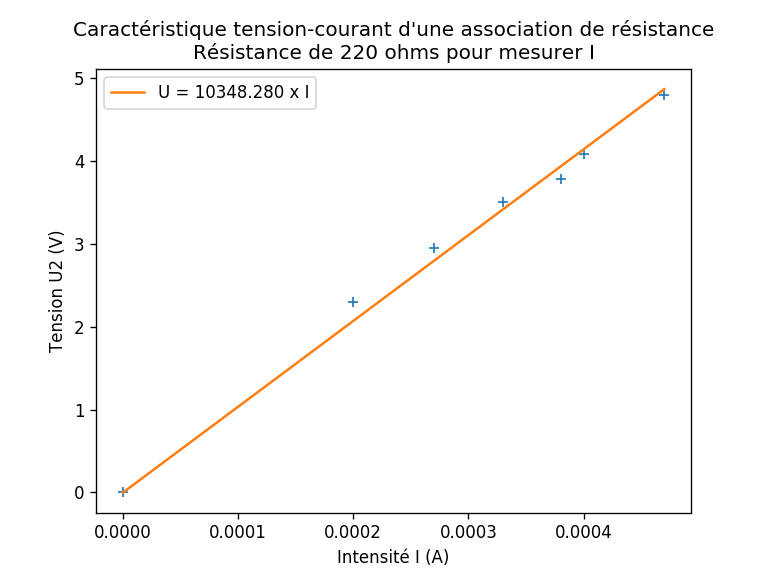

<IPython.core.display.Javascript object>


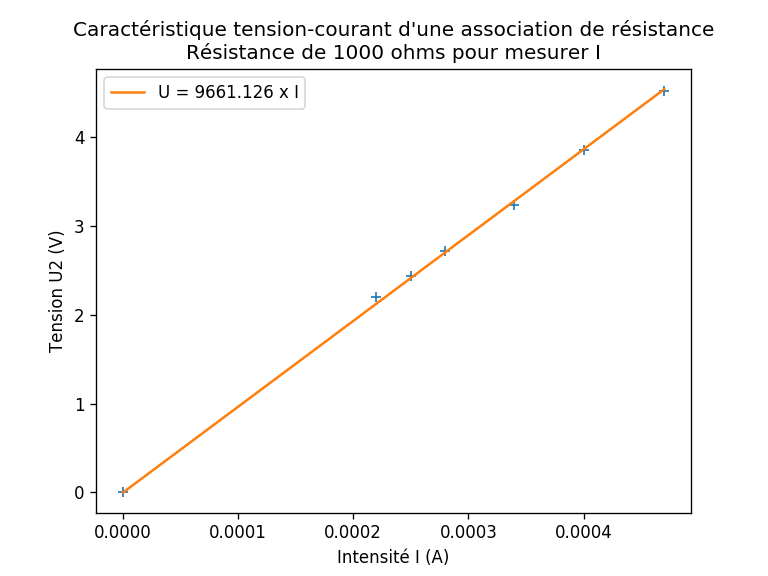

In [22]:
#Les programmes sont les mêmes que pour la question 11 avec les nouvelles données

#En utilisant une résistance de 220 ohms pour mesurer I
U=[0.,2.3,2.95,3.50,3.78,4.08,4.79]
I=[0.,0.2e-3,0.27e-3,0.33e-3,0.38e-3,0.4e-3,0.47e-3]
plt.figure("Question 19°) -R3 = 220 ohms-")
plt.plot(I,U,"+")

def lineaire(x,a):
    return a*x
    
params,cov = curve_fit(lineaire,I,U)

modele=[]
x=[0]+I
for i in x:
    modele.append(lineaire(i,*params))
plt.plot(x,modele,label="U = {:.3f} x I".format(*params))

plt.legend()
plt.xlabel("Intensité I (A)")
plt.ylabel("Tension U2 (V)")
plt.title("Caractéristique tension-courant d'une association de résistance\nRésistance de 220 ohms pour mesurer I")
plt.show()

#En utilisant une résistance de 1000 ohms pour mesurer I on est plus précis
U=[0.,2.2,2.44,2.72,3.24,3.86,4.52]
I=[0.,0.22e-3,0.25e-3,0.28e-3,0.34e-3,0.40e-3,0.47e-3]
plt.figure("Question 19°) -R3 = 1000 ohms-")
plt.plot(I,U,"+")

def lineaire(x,a):
    return a*x
    
params,cov = curve_fit(lineaire,I,U)

modele=[]
x=[0]+I
for i in x:
    modele.append(lineaire(i,*params))
plt.plot(x,modele,label="U = {:.3f} x I".format(*params))

plt.legend()
plt.xlabel("Intensité I (A)")
plt.ylabel("Tension U2 (V)")
plt.title("Caractéristique tension-courant d'une association de résistance\nRésistance de 1000 ohms pour mesurer I")
plt.show()

<b>20°)</b> Réalisez la même étude dans le cas d'une LED en utilisant le montage de la <b>figure 5.</b> ci-dessous. Vous pourrez utiliser une résistance de 220 ohms. Vous écrirez ci-dessous <b style="color:red;">les programmes python nécessaires.</b>
<p><center><b>Figure 5. Montage à Réaliser</b>
    <img src="./TP2_figure5.png"></center></p>

In [23]:
hide_toggle("Correction")

<IPython.core.display.Javascript object>


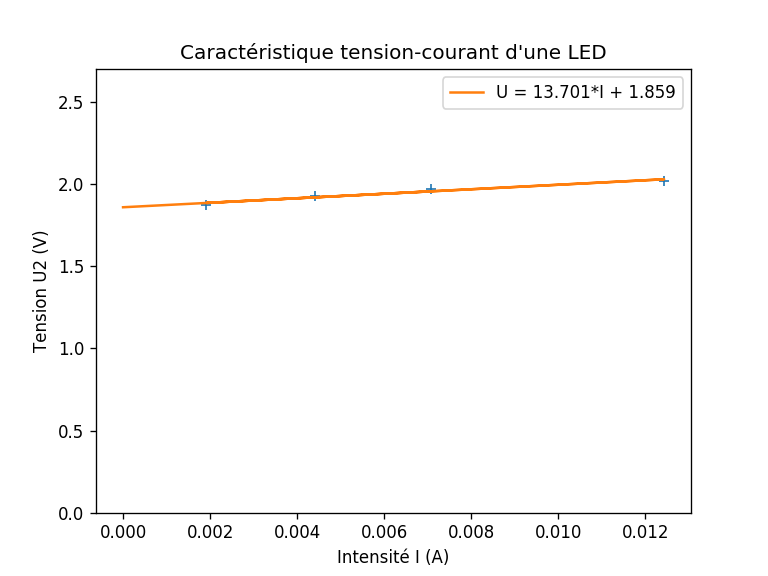

In [24]:
#Caractéristique LED
#Ici les points semblent alignés mais la droite ne passe pas par zéro donc on utilise un modèle affine.
U = [2.02,1.87,1.93,1.97]
I = [12.43e-3,1.91e-3,4.40e-3,7.07e-3]
plt.figure("Question 20°)")
plt.plot(I,U,"+")

def affine(x,a,b):
    return a*x + b
    
params,cov = curve_fit(affine,I,U)

modele=[]
x=[0]+I
for i in x:
    modele.append(affine(i,*params))
plt.plot(x,modele,label="U = {:.3f}*I + {:.3f}".format(*params))

plt.legend()
plt.xlabel("Intensité I (A)")
plt.ylabel("Tension U2 (V)")
plt.title("Caractéristique tension-courant d'une LED")
plt.ylim([0.,2.7])
plt.show()

<b>21°)</b> Réalisez la même étude dans le cas d'une pile AA de 1,5V en utilisant le montage de la <b>figure 6.</b> ci-dessous. La résistance à utiliser est celle de $10\ \Omega$. Vous écrirez ci-dessous <b style="color:red;">les programmes python nécessaires.</b>
<p><center><b>Figure 6. Montage à Réaliser</b>
    <img src="./TP2_figure6.png"></center></p>

In [25]:
hide_toggle(texte="Correction")

<IPython.core.display.Javascript object>


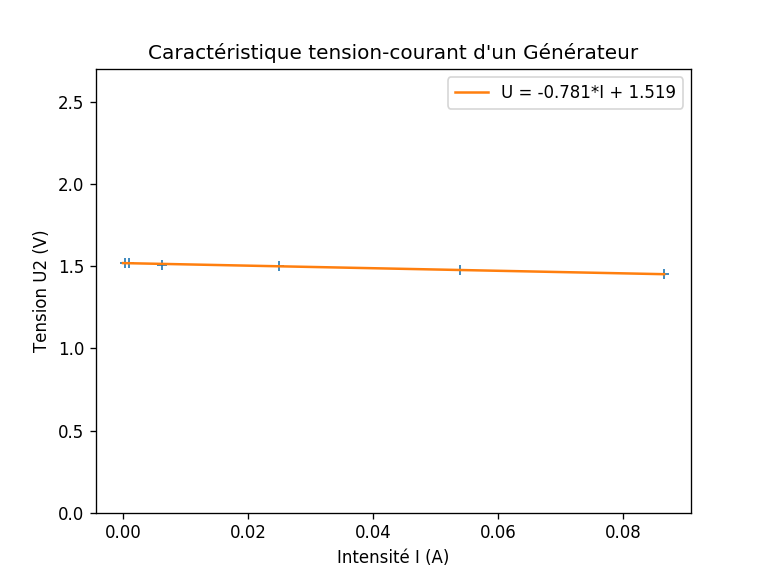

In [26]:
#Etude d'une Pile AA 1.5V
U = [1.52,1.52,1.51,1.50,1.48,1.45]
I = [0.24e-3,0.98e-3,6.29e-3,25e-3,53.8e-3,86.5e-3]
plt.figure("Question 21°)")
plt.plot(I,U,"+")

def affine(x,a,b):
    return a*x + b
    
params,cov = curve_fit(affine,I,U)

modele=[]
x=[0]+I
for i in x:
    modele.append(affine(i,*params))
plt.plot(x,modele,label="U = {:.3f}*I + {:.3f}".format(*params))

plt.legend()
plt.xlabel("Intensité I (A)")
plt.ylabel("Tension U2 (V)")
plt.title("Caractéristique tension-courant d'un Générateur")
plt.ylim([0.,2.7])
plt.show()

In [27]:
hide_toggle(texte="Pour_aller_plus_loin")

<IPython.core.display.Javascript object>


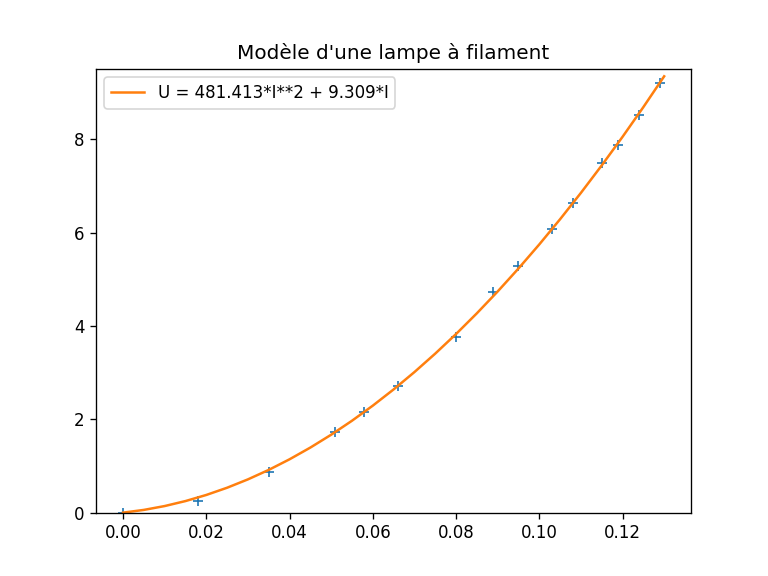

<IPython.core.display.Javascript object>


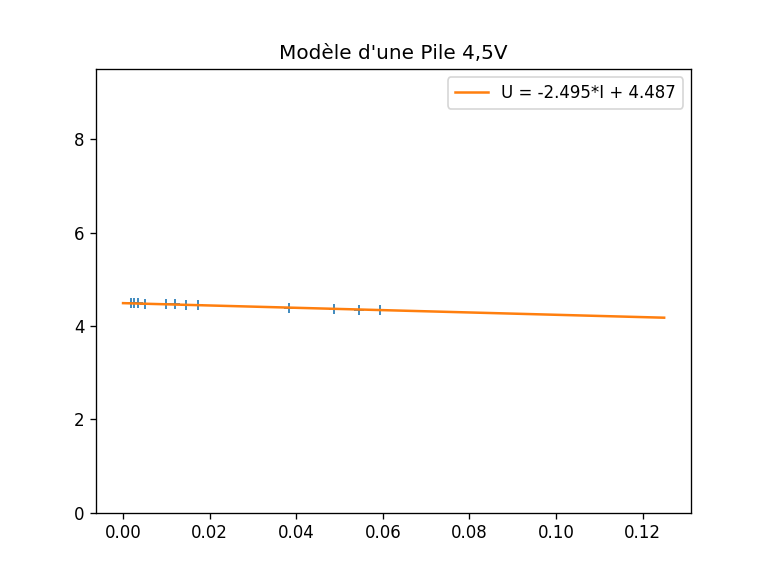

<IPython.core.display.Javascript object>


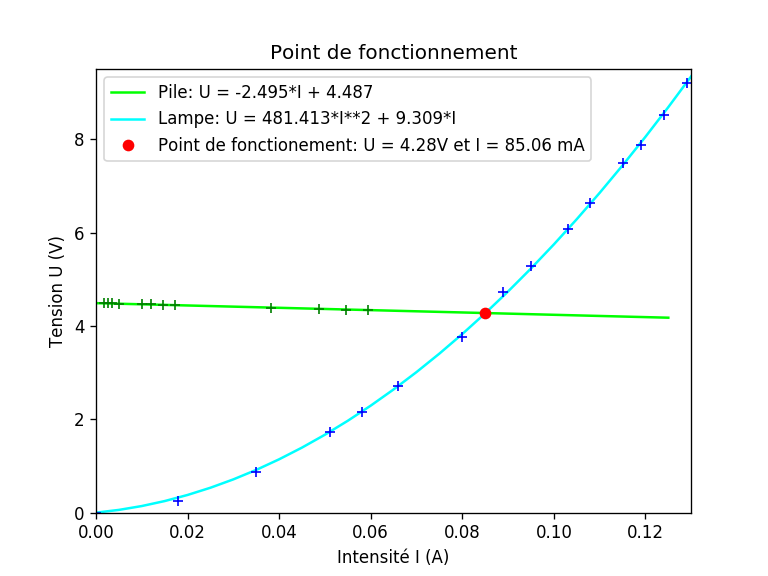

In [28]:
#Modélisation d'un point de fonctionnement

#1°) Modélisation d'une lampe à filament
Ul = [0,0.25,0.88,1.72,2.16,2.72,3.76,4.72,5.28,6.08,6.64,7.48,7.88,8.51,9.2]
Il = [0, 0.018, 0.035, 0.051, 0.058, 0.066, 0.080, 0.089, 0.095, 0.103, 0.108, 0.115, 0.119, 0.124, 0.129]
plt.figure("Pour aller plus loin 1")
plt.plot(Il,Ul,"+")

def parabole(x,a,b):
    return a*x**2 + b*x
    
pLampe,cov = curve_fit(parabole,Il,Ul)
modele1=[0.]
dx = 0.005
x1 = [0.]
while x1[-1] <= 0.130:
    x1.append(x1[-1]+dx)
    modele1.append(parabole(x1[-1],*pLampe))
plt.plot(x1,modele1,label="U = {:.3f}*I**2 + {:.3f}*I".format(*pLampe))
plt.legend()
plt.ylim([0.,9.5])
plt.title("Modèle d'une lampe à filament")
plt.show()



#2°) Modélisation d'une pile 4.5V
Up = [4.49, 4.49, 4.48, 4.46,4.46,4.46,4.45,4.44,4.39,4.37,4.35,4.34]
Ip = [0.0018, 0.0026, 0.0034, 0.0051, 0.010, 0.0121, 0.0146, 0.0172, 0.0383, 0.0487, 0.0545, 0.0594]
plt.figure("Pour aller plus loin 2")
plt.plot(Ip,Up,"+")

def affine(x,a,b):
    return a*x + b
    
pPile,cov = curve_fit(affine,Ip,Up)
modele2=[]
dx = 0.005
x2 = [0.]
while x2[-1] <= 0.130:
    modele2.append(affine(x2[-1],*pPile))
    x2.append(x2[-1]+dx)
x2 = x2[:-1]
plt.plot(x2,modele2,label="U = {:.3f}*I + {:.3f}".format(*pPile))
plt.legend()
plt.ylim([0.,9.5])
plt.title("Modèle d'une Pile 4,5V")
plt.show()



#3°) Les deux ensemble + calcul du point de fonctionnement
#On utilise les deux modèles précédents et on cherche où les courbes se coupent.

#On démarre à i = 0 et on augmente i progressivement par pas de di jusqu'à ce que les deux modèles soient à moins de 1mV l'un de l'autre.
i = 0.
di = 0.00001
while abs(affine(i,*pPile)-parabole(i,*pLampe))>1e-3:
    i+=di

plt.figure("Pour aller plus loin 3")

#On affiche la courbe de la pile
plt.plot(x2,modele2,label="Pile: U = {:.3f}*I + {:.3f}".format(*pPile),color="#00FF00")
plt.plot(Ip,Up,"+",color="green")

#On affiche la courbe de la lampe
plt.plot(x1,modele1,color="cyan",label="Lampe: U = {:.3f}*I**2 + {:.3f}*I".format(*pLampe))
plt.plot(Il,Ul,"+",color="blue")

#On affiche le point de fonctionnement calculé
plt.plot(i,affine(i,*pPile),"o",color="red",label="Point de fonctionement: U = {:.2f}V et I = {:.2f} mA".format(affine(i,*pPile),1000*i))

plt.legend()
plt.ylim([0.,9.5])
plt.xlim([0.,0.130])
plt.xlabel("Intensité I (A)")
plt.ylabel("Tension U (V)")
plt.title("Point de fonctionnement")
plt.show()

<h2><a href="#Titre">Retour au début du TP</a></h2>